In [3]:
import TensorFrost as tf
import numpy as np
import matplotlib.pyplot as plt
import time

tf.initialize(tf.cpu, "H:/cl_compile.bat /O2 /fp:fast /openmp")

S = 128

def mandelbrot():
    canvas = tf.zeros([3, S, S], tf.float32)
    i, j = tf.indices([S, S])
    x, y = tf.float(i), tf.float(j)

    f = 16*2*np.pi/S
    canvas[0, i, j] = tf.sin(x * f)
    canvas[1, i, j] = tf.cos(y * f)
    canvas[2, i, j] = tf.sin(x * f) * tf.cos(y * f)

    return [canvas]

mand = tf.program(mandelbrot)

res = mand()

resnp = res[0].numpy

print(resnp.shape)
print(resnp)

TensorProgram:
  Kernel count: 2
  Intermediate buffers: 1
  Lines of generated code: 116
  IR size: 108

(128, 128, 3)
[[[ 0.0000000e+00  1.0000000e+00  0.0000000e+00]
  [ 7.0710665e-01  1.0000000e+00  7.0710665e-01]
  [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
  ...
  [-7.0709324e-01  1.0000000e+00 -7.0709324e-01]
  [-1.0000000e+00  1.0000000e+00 -1.0000000e+00]
  [-7.0712256e-01  1.0000000e+00 -7.0712256e-01]]

 [[ 0.0000000e+00  7.0710689e-01  0.0000000e+00]
  [ 7.0710665e-01  7.0710689e-01  4.9999997e-01]
  [ 1.0000000e+00  7.0710689e-01  7.0710689e-01]
  ...
  [-7.0709324e-01  7.0710689e-01 -4.9999049e-01]
  [-1.0000000e+00  7.0710689e-01 -7.0710689e-01]
  [-7.0712256e-01  7.0710689e-01 -5.0001127e-01]]

 [[ 0.0000000e+00  3.1391647e-07  0.0000000e+00]
  [ 7.0710665e-01  3.1391647e-07  2.2197243e-07]
  [ 1.0000000e+00  3.1391647e-07  3.1391647e-07]
  ...
  [-7.0709324e-01  3.1391647e-07 -2.2196822e-07]
  [-1.0000000e+00  3.1391647e-07 -3.1391647e-07]
  [-7.0712256e-01  3.1391

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


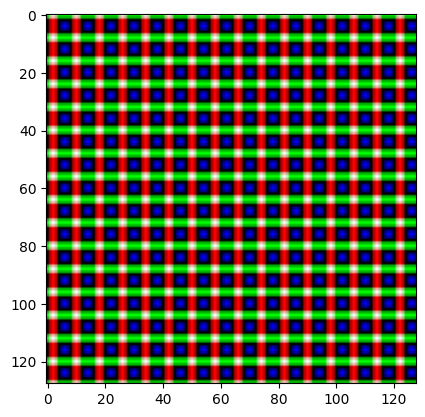

In [4]:
# plot the result
plt.imshow(resnp)
plt.show()